<a href="https://colab.research.google.com/github/loroldoesmath/intro-to-ML/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

Logistic Regression is an ideal machine learning technique for tasks that involve *binary classification*, meaning our target variable only has two possible outcomes, like "yes/no" or "fraud/not fraud" or "cancer/not cancer".

It is based on the sigmoid function, also called the logistic function, which gives us an 'S' shaped curved that can take any real number and map it to a value between 0 and 1.

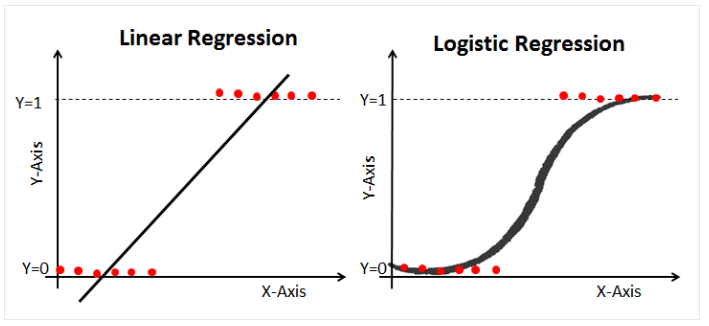

## Set Up

For this example, we'll be using [this dataset](https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data?resource=download) and attempting to classify loan applications.

Let's begin by importing the necessary libraries and uploading our dataset.

In [ ]:
# Import Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

❓ Why don't we just import the entire sklearn library?

In [ ]:
# Upload dataset

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('loan_data.csv')

Saving loan_data.csv to loan_data.csv


## Preprocessing

Let's start by identifying our features and our target variable. To keep things simple, let's limit the features to: `person_age`, `person_income`, `loan_amnt`, `loan_percent_income`, `credit_score`, and `previous_loan_defaults_on_file`.

Notice that we have a categorical variable in our features we need to encode: person_gender.

Then, we'll split the dataset into 75% training and 25% test data.

In [ ]:
# Identify features and target
feature_cols = ['person_age', 'person_income', 'loan_amnt', 'loan_percent_income', 'credit_score']
X = encoded_df[feature_cols]
y = encoded_df.loan_status

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


## Model Development and Prediction

First, we import the LogisticRegression module and create a logistic regression classifier object using the `LogisticRegression()` function with random_state for reproducibility.

Then, we fit the model on the train set using `fit()` and perform prediction on the test set `usingpredict()`.

In [ ]:
encoded_df.dtypes

,0
person_age,float64
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64
cb_person_cred_hist_length,float64


In [ ]:
# Instantiate the Model
logreg = LogisticRegression(random_state = 42)

# Fit the model with our data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

## Model Evaluation

Recall that a confusion matrix is a table that we can use to evaluate and visualize the performance of a classification model. The fundamental part of a confusion matrix is the number of correct and incorrect predictions summed up class-wise.

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[8489,  274],
       [1790,  697]])

Text(0.5, 427.9555555555555, 'Predicted label')

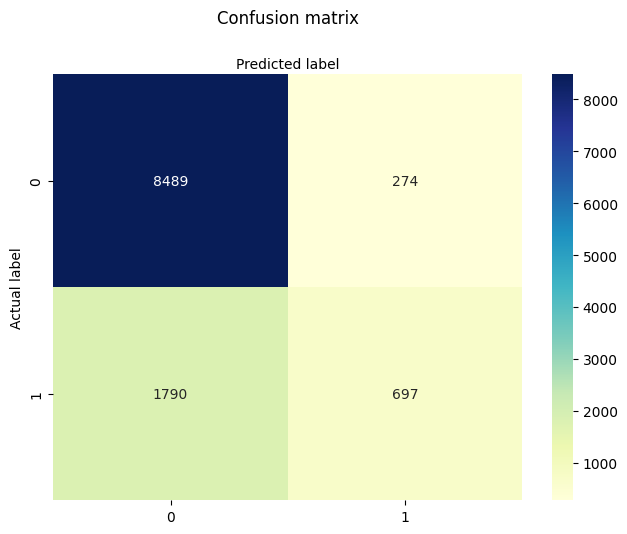

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['loan_denied', 'loan_approved']
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

  loan_denied       0.83      0.97      0.89      8763
loan_approved       0.72      0.28      0.40      2487

     accuracy                           0.82     11250
    macro avg       0.77      0.62      0.65     11250
 weighted avg       0.80      0.82      0.78     11250



## Logistic Regression with More Features

Now, would you expect our model to be more accurate if we used all of the features available?

✅ Try it yourself: Encode categorical variables from our same `loan_data.csv` dataset and create a logistic regression model to predict `loan_status`.

In [ ]:
# Your code here

❓ Did your model perform better than the one above?